<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:** Titus Bridgwood, Itua Etiobhio, Inesa Lisnic

## Context

Imagine we are the data science team for a popular sports betting website, bet366. The management have asked us to find statistical grounding for some of the most common myths surrounding the results of football matches. In this document we will be examining four of these hypotheses and seeing whether the purported relationships exist or not. We will be looking at the 2018/2019 English Premier League season. 

## The Hypotheses

1. Is a team more likely to win playing at home?
    * $H_0$: There is no relationship between the team's home and away match performance.
    * $H_1$: A team is significantly more likely to win if they play at home.
    
  
2. Is there a relationship between the age of a player and the minutes that the player plays?
    * $H_0$: There is no relationship between a player's age and the minutes that a player plays in a season.
    * $H_1$: A player is significantly more likely to play more minutes if they are older.
    

3. If there are more cards in a game, are there more goals scored?
    * $H_0$: There is no significant reltationship between the number of cards in a game and the number of goals scored. 
    * $H_1$: If there are more cards in a game, it is significantly more probable that there will be more goals.
    


4. If a foreign player more likely to score than an english player?
    * $H_0$: A foreign player is no more likely to score more goals than an english player.
    * $H_1$: A foreign player is more likely to score more goals than an english player.


#### Analysis

In [74]:
from __future__ import print_function, division # Importing the necessary libraries for our work. 
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower, TTestPower
import functions as fn
sns.set()




/Users/tiebridgwood/Documents/Coding/Flatiron_DSC/mod3project/functions.py


In [54]:
%load_ext autoreload
%autoreload 2

## Hypothesis 1 - The home team advantage

### Introduction to the hypothesis

It is a widely held belief, and an intuitive fact that playing at home gives a team an advantage. Liverpool have recently gone undefeated at home for 46 consecutive games. However is there really a statistically significant relationship between playing at home and winning?

### Choosing a significance level

Our alpha or *α* for this hypothesis test, is set at a significance level of 0.05. This indicates a 5% risk of concluding that a difference exists when there is no actual difference. Alpha sets the standard for how extreme the data must be before we can reject the null hypothesis. Considering we are producing results for a betting site, we want to be fairly confident in rejecting the null hypothesis before we recommend any business actions on the part of Bet366. For this purpose an alpha level of 0.05 seems appropriate. If this hypothesis test results in a p-value of less than 0.05 then we will reject the null hypothesis. 

In [143]:
hy1_alpha = 0.05

Using information pulled from APIs we have made new columns for binary values of home team wins and away team wins. 

In [32]:
hy1_df = pd.read_csv('Footytable.csv')

In [33]:
hy1_df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Total_goals,home_team_win,away_team_win
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.75,1.70,2.29,2.21,1.55,4.07,7.69,3,1,0
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,2.20,2.13,1.80,1.75,1.88,3.61,4.70,2,1,0
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,2.18,2.11,1.81,1.77,2.62,3.38,2.90,2,0,1
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,1.80,2.13,2.06,7.24,3.95,1.58,3,0,1
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2.20,2.12,1.80,1.76,4.74,3.53,1.89,3,0,1


In [84]:
from hypothesis_tests import sampling

In [89]:
random_home_sample= sampling(hy1_df, 100, 'home_team_win', 1)
random_away_sample = sampling(hy1_df, 100, 'away_team_win', 1)

In [90]:
def hist_sample(sample, title): # Function for making histograms. 
    plt.hist(sample)
    plt.title(f"Number of Sample {title}")
    plt.ylabel("Number of games")

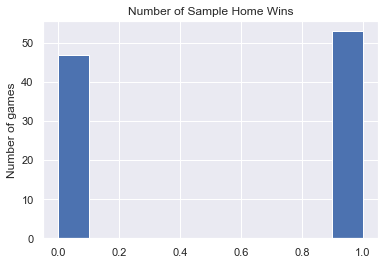

In [91]:
hist_sample(random_home_sample, 'Home Wins')

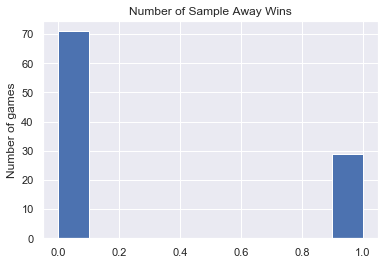

In [92]:
hist_sample(random_away_sample, 'Away Wins')

We have created two distributions with 1 representing a win and 0 representing losses and draws. We will then be comparing these distributions using a Welch's T-Test.

In [93]:
print(np.var(random_home_sample), np.var(random_away_sample))

0.24910000000000007 0.20589999999999978


### Welch's T-Test

For the analysis of statistical significance in this case we have used the Welch's T-Test. We have done so for the following reasons:

* These are two disparate groups; we are not testing repeated performance for specific teams, but rather assessing the wins and losses for the league as a whole. 
* The variance between the two groups is not the same. The variance for the sample of home wins and losses is 0.245 whereas the variance for the sample of away wins and losses is 0.205. A Welch's T-Test is typically preferred when variances between samples are not equal
* The Welch's T-Test is more robust. It is more capable of dealing with skewed distributions and binary distributions, such as the one we have here. 
    
First we will calculate our T-statistic. Then we will calculate our ciritcal T-value as a threshold so that if the resultant T-statistic from our T-test is greater than this threshold we can reject our null hypothesis. 

In [141]:
# With equal variance set to false Scipy's Independent T-Test defaults to a welch's T-Test
hy1_test = stats.ttest_ind(random_home_sample, random_away_sample, equal_var=False) 
hy1_t = hy1_test.statistic
hy1_p = hy1_test.pvalue
hy1_t

3.5401620376399805

So our t-statistic is 3.236, but without a critical T-value this doesn't mean very much. Now we have to calculate our critical T-value, and in order to do so we must first calculate the degrees of freedom for our samples. Calculating the degrees of freedom for a Welch's T-test we have to use the Welch-Satterthwaite equation in order to account for the unequal variances; we have made a function for this. 

In [95]:
from hypothesis_tests import welch_dof

In [96]:
hy1_dof = welch_dof(random_home_sample, random_away_sample) # Getting our W-S Degrees of freedom
hy1_dof

196.23106263335885

In [97]:
hy1_t_crit = np.round(stats.t.ppf(1-0.05, df=hy1_dof), 3) # Using our degrees of freedom to calculate our critical T-value
hy1_t_crit

1.653

We can already see that our T-statistic has crossed the critical threshold, but a visualisation will make this clearer. As we will be relying on the T-test as our primary hypothesis test across our hypotheses, we have made a function for this visualistation. 

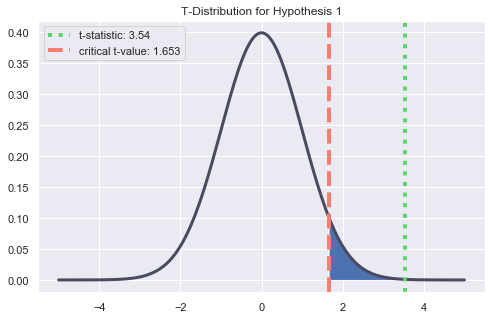

In [98]:
from hypothesis_tests import make_t_dist
make_t_dist(hy1_t, hy1_t_crit, hy1_dof, 'T-Distribution for Hypothesis 1')

The green line on the figure above represents the T-statistic from our Welch's T-Test, and the red line represents our threshold. We have clearly crossed our threshold by quite some margin so we can comfortably reject our null hypothesis and say that there is a statistically significant difference between the number of home wins and the number of away wins in the premier league. 

However in order to qualify our rejection we must also look at the p-value, power and effect size for this statistical test. 

### Other considerations: Cohen's D and Power

We calculated our p-value earlier with our T-test, however we will still need to calculate our power and our effect size, which we will do with a calculaion of Cohen's D, a way of measurin the distance between the means while acounting for uneual variance between samples.

In [99]:
from hypothesis_tests import cohen_d

In [159]:
hy1_cohen_d = cohen_d(random_home_sample, random_away_sample) # Calculating Cohen's D
hy1_cohen_d

0.5006545166628833

In [162]:
power_analysis1 = TTestIndPower() #Using Cohen's D to calculate the power of our analysis.
hy1_power = power_analysis1.solve_power(effect_size=hy1_cohen_d, nobs1=len(random_home_sample), alpha=hy1_alpha)
hy1_power

0.9409707940378251

### Conclusions and Limitations

From the Welch's T-test, the calculated p value is 0.0007, effect size (cohen’s d) = 0.46 and power = 89.9%. As the p value is lower than the alpha (0.05) we can reject the null hypothesis. However calculating an incredibly low p-value does not guarantee that the null-hypothesis is incorrect. Therefore we calculated cohen’s d (0.46). Using the general “rule of thumb” guidelines this means there is a medium effect. The statistical power is ~90%. This high power suggest a high probability of rejecting the null hypothesis, given that it is indeed false. 

In conclusion, we can reject the null hypothesis as our p-value is smaller than the alpha level we set initially, there is a high statistical power and a medium effect size. We can therefore give actionable insight to our management at Bet366 that there is a considerable advantege to playing at home. 

There are however some limitations to our findings. Our analysis is not a regression analysis so we cannot say with any certainty just how much of a difference playing at home makes. Furthermore our sample sizes are not overly large so we could in theory obtain more data for a more thorough analysis.

## Hypothesis 2 - Older players, more minutes?

### Introduction to Hypothesis

Our initial intuition is that experience is everything. You might be a young hotshot, but a team needs experience to win games. As such we imagined that younger players would be given less time on the pitch than their older and more proven countreparts. However we could be wrong, it could be that younger, spryer players have higher levels of fitness and are therefore more likely to cope with a full 90 minute stint. This could be valuable information for Bet366, just how long will a player stay on the pitch? How will a younger team deal with going into extra time? We hope our second hypothesis can clarify our intuitions.  

### Choosing a significance level

As with above we wanted to set a standard but stringent alpha or α level of 0.05. Once again if our p-value is less than this alpha threshold we can confidently reject the null hypothesis, with at most a 5% chance of rejecting the null-hypothesis when it is actually true.

In [155]:
hy2_alpha = 0.05

Using player data that we pulled from the footystats API, with only columns for the players' ages and the average minutes that they play per 90 minutes of game time. 

In [78]:
# importing dataframe with age and minutes per match columns
age_min=pd.read_csv('football_players_age_and_minutes.csv')
age_min.head()

,age,min_per_match
0,28,90
1,29,74
2,25,87
3,24,89
4,25,53


We then take the mean of the players' ages, such that any players with an age below this average are considered younger and any above the average are considered older. We then make a new column with binary values in which older players are represented by 1 and younger players are represented by 0.

In [118]:
# computing the players age mean
age_mean=round(age_min['age'].mean(),0)

In [119]:
# creating a new column with the categorized values 0 and 1 which means young and old respectively
age_min['age_category']=age_min['age'].apply(lambda x: 1 if x >= age_mean else 0 )
age_min.head()

,age,min_per_match,age_category
0,28,90,1
1,29,74,1
2,25,87,0
3,24,89,0
4,25,53,0


In [120]:
# counting the young and old players, which signify the populations of young and old players
old=age_min.loc[age_min['age_category']==1]
young=age_min.loc[age_min['age_category']==0]
print(len(old), len(young))

284 216


Seeing that the groups are not equal we decided that we could take a random sample of 100 players from each of the groups, with their associated average minutes played.

In [128]:
# sampling an equal size of samples from both the young and old populations
sample_old_min=sampling(old, 100, 'min_per_match',1)
sample_young_min=sampling(young, 100, 'min_per_match', 1)

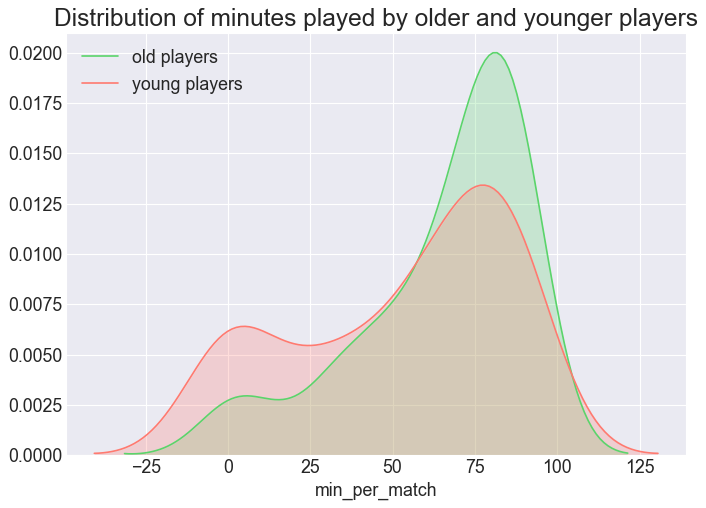

In [138]:
from visualizations import overlapping_density
overlapping_density(sample_old_min, sample_young_min, 'old players', 'young players', 'Distribution of minutes played by older and younger players')

Above we have the distributions for young and old players based on minutes played per match.
We assume that the sample mean of older players is bigger than the sample mean for younger players.
Considering the same variancy and size of the samples, we will use the Two samples T-test in order to verify the probability of random occurence in these samples. 

In [139]:
print(np.var(sample_young_min), np.var(sample_old_min))

1019.4524000000004 643.6090999999998


### Welch's T-Test, our consistent friend

Throughout our analysis we will be coming back to the Welch's T-Test because none of our random samples have the same variance. The variance of the sample of younger players is 1019 wheareas the variance of our older players is around 643. 

Although the distributions for these players are getting closer to normal than the previous distribution, the Welch's T-Test is best placed to deal with the peaks present at 90 and 0 minutes. 

In [198]:
hy2_test=stats.ttest_ind(sample_old_min, sample_young_min, equal_var=False)
hy2_t = hy2_test.statistic
hy2_p = hy2_test.pvalue
hy2_t

2.979059013158594

Again we calculate our degrees of freedom with the Welch-Satterthwaite test, so that we can use this to compute our critical T-Value and get an idea of whether we can reject our null hypothesis or not. 

In [199]:
hy2_dof=fn.welch_dof(sample_young_min,sample_old_min)
hy2_dof

188.37880444026584

In [200]:
hy2_t_crit = np.round(stats.t.ppf(1-0.05, df=hy2_dof), 3)
hy2_t_crit

1.653

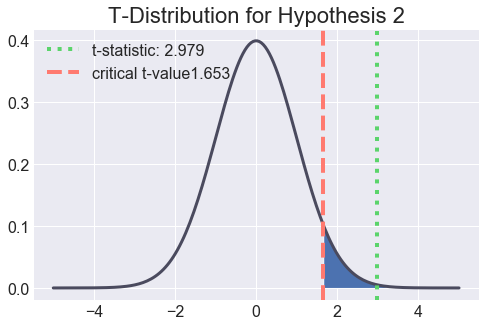

In [201]:
make_t_dist(hy2_t, hy2_t_crit, hy2_dof, 'T-Distribution for Hypothesis 2')

Our handy T-distribution function serves us once again to see that there is indeed a statistically significant difference in the number of minutes played by older than average players in the premier league. The threshold we set ourselves with our alpha value of 0.05 has been crossed and we can be confident in rejecting our null hypothesis. 

However in order to qualify our rejection we must also look at the p-value, power and effect size for this statistical test. 

### Other considerations: Cohen's D and Power

We calculated our p-value earlier with our T-test, however we will still need to calculate our power and our effect size, which we will do with a calculaion of Cohen's D, a way of measuring the distance between the means while acounting for uneual variance between samples.

In [202]:
hy2_cohen_d = cohen_d(sample_young_min, sample_old_min)
print(hy2_cohen_d, hy2_p)

-0.42130256595186927 0.003272078540836404


In [203]:
#Using Cohen's D to calculate the power of our analysis.
power_analysis2 = TTestIndPower() #Using Cohen's D to calculate the power of our analysis.
hy2_power = power_analysis2.solve_power(effect_size=hy2_cohen_d, nobs1=len(sample_old_min), alpha=hy2_alpha)
hy1_power

0.9409707940378251

### Conclusions and Limitations

From the Welch's T-test, the calculated p value is 0.0032, effect size (cohen’s d) = 0.42 and power = 0.94. As the p value is lower than the alpha (0.05) we can reject the null hypothesis. However calculating an incredibly low p-value does not guarantee that the null-hypothesis is incorrect. Therefore we calculated cohen’s d (0.42). Using the general “rule of thumb” guidelines this means there is a medium effect. The statistical power is ~94%. This high power suggest a high probability of rejecting the null hypothesis, given that it is indeed false. 

In conclusion, we can **reject the null hypothesis** as our p-value is smaller than the alpha level we set initially, there is a high statistical power and a medium 
effect size. We can therefore give actionable insight to our management at Bet366 that older than average players are likely to play more minutes. They can therefore make appropriate changes with regards to individual player predictions, namely minutes played and likely substitutions. 

The same limitations apply to our findings as above. Our analysis is not a regression analysis so we cannot say with any certainty just how much of a difference age makes to the minutes played; we took the age as the cut off point between the two groups and our analysis might have been very different had we chosen some other threshold. Furthermore our sample sizes are not overly large so we could in theory obtain more data for a more thorough analysis.

## Hypothesis 3 - Red card goal onslaught?

### Introduction to hypothesis
Betting markets tend to go wild with the introduction of a red card to a game, with considerable changes specifically to odds of scoring and to odds of winning. We wanted to test whether there was any statistical grounding for there being more goals in a game in which there are red cards. We will keep the same alpha value of 0.05 as before for the same reasons we have discussed earlier.  

In [164]:
hy3_alpha = 0.05

We've used the same information that we retrieved from the football data api but this time we looked at the columns with red cards, *hr* and *ar* (home red and away red) and created a new binary column such that if a game has one or more red card it is marked `True` as a red card game and `False` otherwise.

In [168]:
hy3_df = pd.read_csv('cards_df.csv')
hy3_df[['red_game', 'goals']].head()

,red_game,goals
0,False,3
1,False,2
2,False,2
3,False,3
4,False,3


We then split these into two groups depending on whether there was a red card or not in the game. 

In [170]:
red_games = hy3_df.loc[hy3_df['red_game'] == True]
no_red_games = hy3_df.loc[hy3_df['red_game'] == False]

In [173]:
print(len(red_games), len(no_red_games))

44 336


Seeing we only have 44 matches with red cards, we decided an appropriate sample size would be 30, this will give us just enough leeway to sample 'randomly' while still giving us a decent sample size with which to work. 

In [174]:
red_games_sample = sampling(red_games, 30, 'goals', 1)
no_red_games_sample = sampling(no_red_games, 30, 'goals', 1)

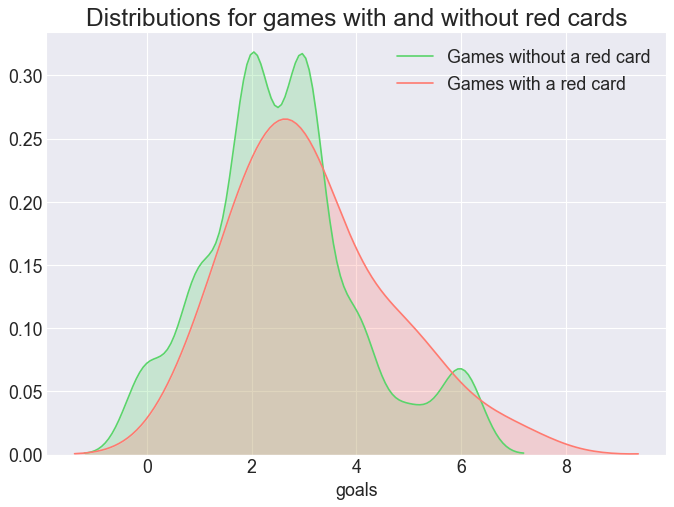

In [176]:
overlapping_density(
    no_red_games_sample, red_games_sample, 
    "Games without a red card", 'Games with a red card', 
    'Distributions for games with and without red cards'
)


In our samples it seems as though there are very particular particular outcomes for games with red cards, although this could just be that we don't have enough samples for there to be a more normalised distribution.

In [178]:
print(np.var(no_red_games_sample), np.var(red_games_sample))

2.106666666666666 2.115555555555556


### Hello T-Test my old friend

Once again our variances are different for our samples so the Welch's T-Test will be the appropriate test. The variance for the goals in games with no reds is 2.106 and the variance for games with a red is 2.115.

In [204]:
hy3_test=stats.ttest_ind(no_red_games_sample, red_games_sample, equal_var=False)
hy3_t = hy3_test.statistic
hy3_p = hy3_test.pvalue
hy3_t

-1.3977425408587647

In [205]:
hy3_dof = welch_dof(no_red_games_sample, red_games_sample) # Getting our W-S Degrees of freedom
hy3_dof

57.999742937427435

Aha! A minus value for our T-Test, thankfully our t-test is two tailed. Now let's calculate our critical t-value in order to see how significant our result is. Since out t-test was two tailed we can just look at whether our negative t-value crosses a negative threshold.

In [206]:
# Using our degrees of freedom to calculate our critical T-value
hy3_t_crit = 0 - np.round(stats.t.ppf(1-0.05, df=hy3_dof), 3) 
hy3_t_crit 

-1.672

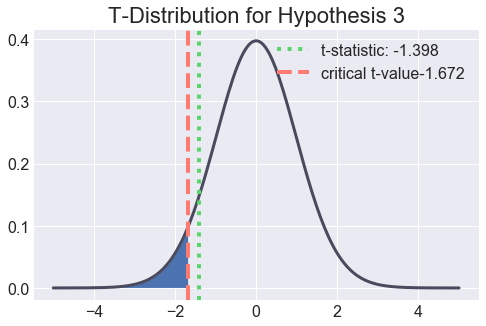

In [207]:
make_t_dist(hy3_t, hy3_t_crit, hy3_dof, 'T-Distribution for Hypothesis 3', direction='left')

In this case our t-statistic has not crossed the threshold we have set ourselves baseed off of our alpha value. For this reason we can already say that we **Fail to reject our null hypothesis**. However we should still look at our Cohen's D and p-value to assess what effect it is that we cannot prove, and our lack of statistical rigour. 

In [208]:
hy3_cohen_d = cohen_d(no_red_games_sample, red_games_sample)
print(hy3_cohen_d, hy3_p)

-0.360895572202109 0.16751374540934097


In this case our Cohen's D is moderate, suggesting that in practical terms, there is a moderate difference in our samples, i.e. there are in fact *less* goals in games in which there are red cards. However as our t-statistic has failed to meet our threshold, and we have a pretty sizeable **p-value of 0.167**, we cannot safely conclude that this effect is actually happening in the world as opposed it simply being a quirk of the data. 

### Conclusions and limitations

In this case the fact that we have failed to reject our null hypothesis is actually important in that at least for this sample it seems to disprove the widely held apocrypha that there is a difference in the number of goals for games in which there is a red card. As a result we would suggest to our odds-makers at BET366 that they do not adjust their odds on the number of goals in a game given that there is a red card. 

There is the limitation to this data in that we do not know at which point the red card was introduced into the game. If a red card is issued in the last five minutes of gameplay, it will be harder for the team that wasn't penalised to make use of the difference in man power than if the red card had occurred in the opening minutes of the game. Again this could be the subject of a more nuanced analysis using for example a regression model accounting for the card was issued. 

## Hypothesis 4

Finally we wanted to see whether non-English players are any better than their English counterparts. With the language-barrier and cultural differences, intuitively it seems as though greater financial incentives would have to be offered for foreign-born players, especially those in whose countries there are already competitive leagues. In order for higher financial incentives to be offered, the quality of the player themselves would therefore have to be higher.

In [191]:
hy4_alpha = 0.05 # You guessed it...

Here we have made another dataframe from the information we retrieved from the footystats api, giving us their nationality, their goals scored, and their position.

In [190]:
hy4_df=pd.read_csv('football_players_by_nationality_and_goals.csv')
hy4_df.head()

,nationality,goals_overall,position
0,Spain,0,Goalkeeper
1,Italy,0,Defender
2,Sweden,1,Defender
3,England,1,Defender
4,Côte d'Ivoire,0,Defender


We have chose midfielders and defenders just so that we can account for whether there is a bias in terms of whether foreign players are more or less likely to be defenders, who are in general less likely to have opportunities to score goals.

In [192]:
national=hy4_df.loc[hy4_df['nationality']=='England']
national_pos=national.loc[(national['position']=='Midfielder')|(national['position']=='Forward')]
foreign=hy4_df.loc[hy4_df['nationality']!='England']
foreign_pos=foreign.loc[(foreign['position']=='Midfielder')|(foreign['position']=='Forward')]

In [193]:
print(len(national_pos), len(foreign_pos))

90 186


We have chosen a sample size here of 60 for the same reasons as above; to keep a large sample size while giving enough room for randomisation.

In [195]:
nat_goals_sample=sampling(national_pos, 60, 'goals_overall', 1)
for_goals_sample=sampling(foreign_pos, 60, 'goals_overall', 1)

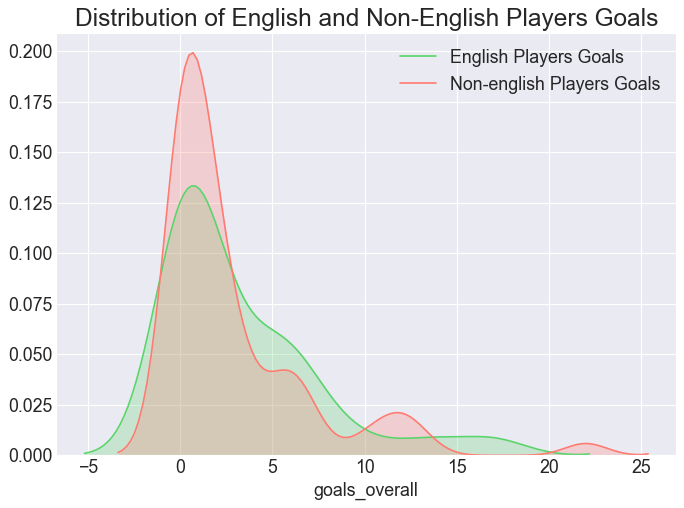

In [197]:
overlapping_density(nat_goals_sample, for_goals_sample,
                    'English Players Goals', 'Non-english Players Goals',
                    'Distribution of English and Non-English Players Goals'
                   )

From our distributions alone it seems as though there are some Non-english superstars in the mid range. But is it enough to be statistically significant. Let's apply our tests.

In [224]:
hy4_test = stats.ttest_ind(nat_goals_sample, for_goals_sample, equal_var=False)
hy4_t = hy4_test.statistic
hy4_p = hy4_test.pvalue
hy4_t

0.4768421247647761

In [225]:
hy4_dof = welch_dof(nat_goals_sample, for_goals_sample)
hy4_dof

117.99913515083648

In [226]:
hy4_t_crit = np.round(stats.t.ppf(1-0.05, df=hy4_dof), 3) 
hy4_t_crit

1.658

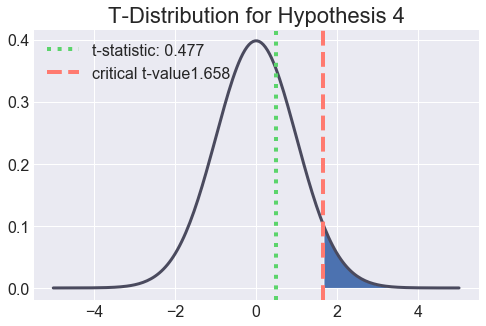

In [227]:
make_t_dist(hy4_t, hy4_t_crit, hy4_dof, 'T-Distribution for Hypothesis 4')

In this case our t-statistic has not crossed the threshold we have set ourselves baseed off of our alpha value. For this reason we can already say that we **Fail to reject our null hypothesis**. However we should still look at our Cohen's D and p-value to assess what effect it is that we cannot prove, and our lack of statistical rigour. 

In [231]:
hy4_cohen_d = cohen_d(nat_goals_sample, for_goals_sample)
print(hy4_cohen_d, hy4_p)

0.08705906270078691 0.6343564432979646


The practical effect size for this test is not particularly large and there is a 63% chance that we could have found this effect size purely by accident anyway. This means that we can safely conclude that there is no significant difference in the number of goals scored by English and non-English players in the premier league. 

### Conclusions and limitations

We would recommend that BET366 does not change its odds for events such as signings of new players, or odds on goals scored based purely on their nationality. 

There are limitations in terms of the size of the samples we were able to look at, and the fact that we selected position is in itself potentially limiting. 

## Next Steps

If we were to repeat these experiments then we would like to collect more data for the variable we have, and more nuanced variables generally; size of our data was certainly our most limiting factor. We could look at data from other leagues, or data from previous years, perhaps including an analysis of variance between these different data sets. 

As we are providing this information to our odds-makers it would also be beneficial to be able to give quanifiable information, i.e. just how much they should change their odds by. In order to give this insight we would have to do a regression analysis. 